In [23]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error as MSE
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
import pandas as pd

## **Example #1: decent gradient**

In [ ]:
#Imput data
x = np.array([49,69,89,99,109])
print('x:\n',x)
#Ouput data
y = np.array([124,95,71,45,18])
print('\ny:\n',y)

x:
 [ 49  69  89  99 109]

y:
 [124  95  71  45  18]


Target function: $MSE(\theta) = \dfrac{1}{m} \sum (Y - \theta X)^2$

Gradient: $\nabla MSE(\theta) = \dfrac{2}{m} \sum (\theta X-Y)X$

Updating equation:

$x_{k+1} = x_k - \alpha_k \nabla f(x_k)$

$x_{k} = x_{k-1} - \alpha_{k-1} \nabla f(x_{k-1})$

We want to find the optimal values of $\theta$

$$x_{k} = \begin{bmatrix}\theta_0\\ \theta_1\end{bmatrix}$$

Replacing in the update equation:

$$\begin{bmatrix} \theta_{0_{k}}\\ \theta_{1_k}\end{bmatrix}= \begin{bmatrix} \theta_{0_{k-1}}\\ \theta_{1_{n-1}} \end{bmatrix}- \alpha \nabla MSE(\begin{bmatrix}\theta_{0_{k-1}}\\ \theta_{1_{k-1}}\end{bmatrix})$$


Replacing the gradient:

$$\begin{bmatrix}\theta_{0_k}\\ \theta_{1_k}\end{bmatrix}= \begin{bmatrix}\theta_{0_{k-1}}\\ \theta_{1_{k-1}}\end{bmatrix}- \alpha\frac{2}{m}x^T([\theta_1\cdot x + \theta_0]-y)$$


In [ ]:
#Define a mse function
def mse(y, y_hat):
  mse_value = 1/y.size * sum((y - y_hat) ** 2)
  return mse_value

In [ ]:
#Define our linspace
nr_thetas = 5
theta0 = np.linspace(start=-10, stop=10, num=nr_thetas)
theta1 = np.linspace(start=-10, stop=10, num=nr_thetas)
theta0, theta1 = np.meshgrid(theta0,theta1)
plot_mse = np.zeros((nr_thetas, nr_thetas))

In [ ]:
#Step by step mse 
for i in range(nr_thetas):
  for j in range(nr_thetas):
    y_hat = theta0[i][j] + theta1[i][j] * x
    plot_mse[i][j] = mse(y, y_hat)

In [ ]:
print('mse step by step', mse(y, y_hat))
print('MSE using sklearn', MSE(y, y_hat))

mse step by step 655478.2000000001
MSE using sklearn 655478.2


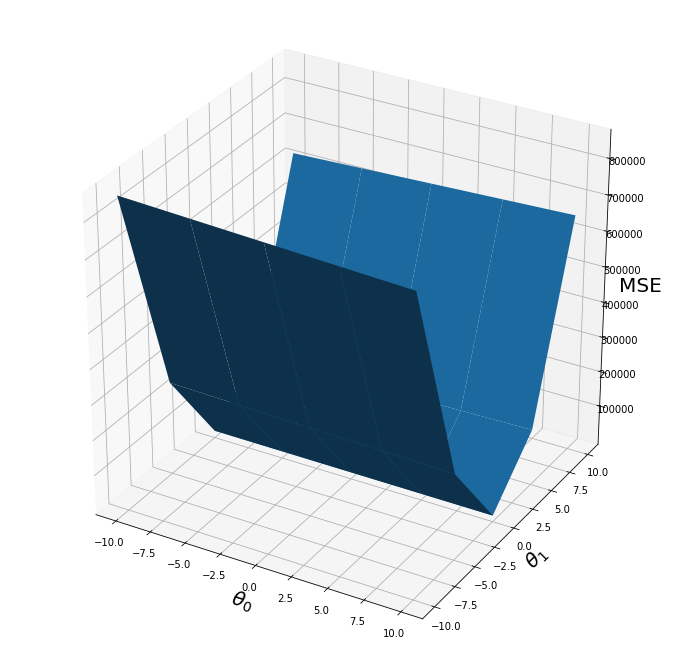

In [ ]:
#Surface obtained
fig = plt.figure(figsize=[12,12])
ax = fig.gca(projection='3d')

ax.set_xlabel(r'$\theta_0$', fontsize=20)
ax.set_ylabel(r'$\theta_1$', fontsize=20)
ax.set_zlabel('MSE', fontsize=20)

ax.plot_surface(theta0, theta1, plot_mse)
plt.show()

In [ ]:
#Parameter obtained
theta = np.array([-1000,100]) #y = theta1*x + theta0 
theta #theta parameter vector [theta0,theta1] which we are trying to optimize

alpha = 0.0001 #tweakable
n_steps = 10000 #tweakable
m = 5 

grads = []
thetas = []

for step in range(n_steps):
  gradient = (2/m) * x.T.dot((x.dot(theta[0]) + theta[1])-y)
  theta = theta - alpha*gradient
  grads.append(gradient)
  thetas.append(theta)

theta

array([ -11.59583109, 1088.40416891])

## **Example #2: Linear SVM**

In [ ]:
#Import our dataset
df = pd.read_csv('pima-indians-diabetes.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Build dataset
dataset = df.iloc[:,:-1].values
target = df.iloc[:,8:].values

In [ ]:
#Normalize x's
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_norm = scaler.fit_transform(dataset)

In [ ]:
#Split manually the inputs and outputs
x_train = dataset_norm[0:536,0:-1]
x_test = dataset_norm[536:,0:-1]

y_train = target[0:536]
y_test = target[536:]

In [ ]:
#Build our model
from sklearn.svm import LinearSVC

svc = LinearSVC(C=100, loss="hinge")

svc.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100, loss='hinge')

In [ ]:
#Validation data
print("Validation data:  \n",y_test)
svc.predict(x_test)

Validation data:  
 [[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

## **Example #3: Kernel SVM**

In [24]:
#Create our data
X, y = make_moons(n_samples=100, noise=0.15, random_state=0)

print(X.shape)

(100, 2)


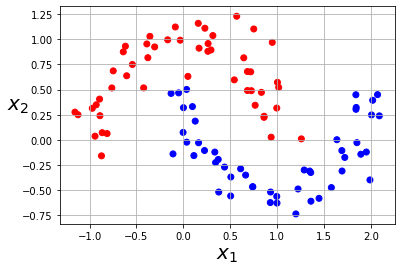

In [25]:
#Plot data
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:,0],X[:,1], c=y, cmap=cm_bright)
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.savefig("make_moon.pdf", format='pdf',tight_layout=False)
plt.grid(True, which='both')
plt.show()

In [26]:
#Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_norm = scaler.fit_transform(X)

In [27]:
#Split data
x_train = dataset_norm[0:70,:]
x_test = dataset_norm[70:,:]

y_train = y[0:70]
y_test = y[70:]

In [29]:
#Build our model
from sklearn.svm import SVC

svk = SVC(kernel='poly', degree=3, coef0=1, C=5)
svk.fit(x_train, y_train)

SVC(C=5, coef0=1, kernel='poly')

In [30]:
#Result
print(y_test)
predict = svk.predict(x_test)
print(predict)

[0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0]
[0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0]


In [31]:
#Evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
print(cm)

[[14  0]
 [ 0 16]]


In [32]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)

print("Precision: ", precision)
print("Recall: ", recall)

Precision:  1.0
Recall:  1.0


In [33]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", markersize=12)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r.", markersize=12)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

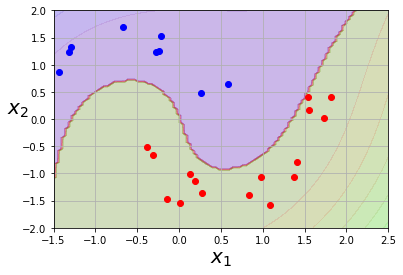

In [34]:
#Final result
plot_predictions(svk, [-1.5, 2.5, -2, 2])
plot_dataset(x_test, y_test, [-1.5, 2.5, -2, 2])
plt.savefig("svm_kernel.pdf", format='pdf')
plt.show()


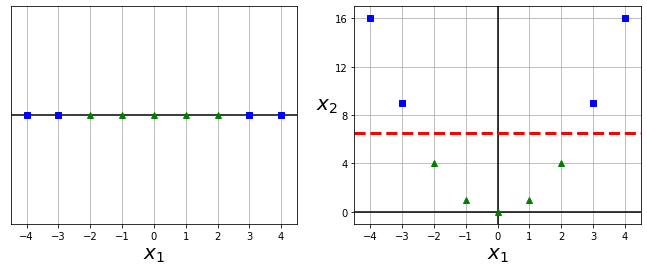

In [35]:
#Kernel SVM
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.savefig("higher_dimensions_plot.pdf", format='pdf', tight_layout=False)
plt.show()